# Setup

In [42]:
# Standard libraries
import numpy as np
import pandas as pd
import requests
import zipfile
import os

# Geospatial libraries
import geopandas as gpd

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Rectangle
from matplotlib import colors as mcolors
from PIL import Image, ImageDraw, ImageFont, ImageOps, ImageColor

# Load Data

## Load Zipcode Shapefile

In [43]:
# URL to the MODZCTA shapefile
url = "https://data.cityofnewyork.us/api/geospatial/pri4-ifjk?method=export&format=Shapefile"

# Download the file
response = requests.get(url)
with open("MODZCTA_2010.zip", "wb") as file:
    file.write(response.content)

In [44]:
# Extract the ZIP file
zip_file_path = "MODZCTA_2010.zip"
extract_folder = "MODZCTA_2010"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_folder)

# Find the shapefile in the extracted folder
shapefile_path = None
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.lower().endswith(".shp"):
            shapefile_path = os.path.join(root, file)
            break  # Stop after finding the first .shp file

# Check if a shapefile was found and load it
if shapefile_path:
    gdf = gpd.read_file(shapefile_path)
    print(f"Loaded shapefile: {shapefile_path}")
else:
    raise FileNotFoundError("No shapefile (.shp) found in the extracted directory.")

# Display data
gdf

Loaded shapefile: MODZCTA_2010/geo_export_e6a34cec-980f-45b5-8551-f7ab1e6889e7.shp


,modzcta,label,zcta,pop_est,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
1,10002,10002,10002,74993.0,"POLYGON ((-73.9975 40.71407, -73.99709 40.7146..."
2,10003,10003,10003,54682.0,"POLYGON ((-73.98864 40.72293, -73.98876 40.722..."
3,10026,10026,10026,39363.0,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,10004,10004,3028.0,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."
...,...,...,...,...,...
173,11434,11434,"11430, 11434",65989.0,"POLYGON ((-73.75461 40.6472, -73.7538 40.6467,..."
174,11435,11435,11435,59296.0,"POLYGON ((-73.80577 40.68293, -73.80606 40.683..."
175,11694,11694,11694,21354.0,"POLYGON ((-73.86496 40.56663, -73.86558 40.567..."
176,11697,11697,11697,3540.0,"POLYGON ((-73.86289 40.57606, -73.86281 40.575..."


## Load Energy Data

In [45]:
# URL of the CSV data
data_url = "https://uil.carto.com/api/v2/sql?format=csv&filename=filtered_evt&q=SELECT%20*%20FROM%20table_2022_disclosure_ll84_viz_11_2022%20WHERE%20(year%20%3E=%201900%20AND%20year%20%3C=%202022)%20AND%20(gfa%20%3E=%2010000%20AND%20gfa%20%3C=%20500035)%20%20AND%20(eui%20%3E=%2050%20AND%20eui%20%3C=%20350)"

# Load the data into a pandas DataFrame
df = pd.read_csv(data_url)
df

,the_geom,cartodb_id,the_geom_webmercator,id,bbl,bin,address,zipcode,bldgtype,idflags,...,gfa_cat,age_cat,value_cat,eui_base,eui_diff,wui_base,wui_diff,ghg_base,ghg_diff,fuel_mix
0,NaN,104,NaN,7386333,1.007590e+09,1090378,338 W 36th St,10018,Hotel,0,...,3,1,4.0,176.5,-0.252691,80.72,-0.207631,5.56,-0.192446,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
1,NaN,175,NaN,6791730,4.150090e+09,4296629,15606 Rockaway Blvd,11434,Hotel,0,...,1,2,1.0,176.8,0.209276,36.48,0.148849,5.88,0.204082,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
2,NaN,207,NaN,14441087,2.058031e+09,2084227,4415 Post Road,10471,Residence Hall/Dormitory,0,...,0,1,0.0,133.1,-0.021037,31.52,0.078997,5.42,-0.038745,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
3,NaN,378,NaN,6814275,2.047320e+09,2060475,1215 E. GUN HILL RD,10469,Bowling Alley,0,...,1,2,0.0,142.1,-0.265306,11.01,-0.345141,4.88,-0.268443,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
4,NaN,603,NaN,6316150,1.002710e+09,1079602,152 Henry Street,10002,Worship Facility,0,...,3,4,1.0,67.9,-0.126657,10.49,-0.891325,2.63,-0.174905,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21127,NaN,26083,NaN,3245991,4.110180e+09,4526727,114-36 202th Street,11412,K-12 School,0,...,0,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
21128,NaN,26084,NaN,1836604,4.096790e+09,4438663,90-40 150th Street,11435,K-12 School,0,...,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"{'Fuel Oil 4': nan, 'Fuel Oil 2': 777216.0, 'N..."
21129,NaN,26205,NaN,25587675,3.003358e+09,3348493;3348494;3348483;3348871;3348869;334887...,113 - 115 Union Street - 222 COLUMBIA ST,11231,Multifamily Housing,1,...,0,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
21130,NaN,26272,NaN,12454140,2.030450e+09,2092221,2068 Bathgate Avenue,10457,Multifamily Housing,1,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"{'Fuel Oil 4': nan, 'Fuel Oil 2': 1139932.4, '..."


In [46]:
df.columns

Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'id', 'bbl', 'bin',
       'address', 'zipcode', 'bldgtype', 'idflags', 'ess', 'year', 'gfa',
       'gfaflags', 'numbldgs', 'numfloors', 'energy', 'eui', 'euiflags', 'wui',
       'wuiflags', 'ghg', 'ghgflags', 'bep_score', 'bldg_class',
       'group_threshold', 'ghgi_25_target', 'ghgi_30_target', 'value',
       'primary_type_size_rate', 'primary_type', 'other_types_dict',
       'has_datacenter', 'electricity', 'bedrooms', 'natural_gas', 'steam',
       'worker_dens', 'res_units', 'diesel', 'fuel_4', 'fuel_2', 'fuel_5_6',
       'gfa_cat', 'age_cat', 'value_cat', 'eui_base', 'eui_diff', 'wui_base',
       'wui_diff', 'ghg_base', 'ghg_diff', 'fuel_mix'],
      dtype='object')

In [47]:
# Group the DataFrame by 'zipcode' and calculate the mean of 'eui', 'wui', and 'ghg'
grouped_df = df.groupby('zipcode').agg({'eui': 'mean', 'wui': 'mean', 'ghg': 'mean'}).reset_index()
grouped_df

,zipcode,eui,wui,ghg
0,10001,131.865049,33.361944,5.077670
1,100016905,52.300000,3.400000,2.690000
2,10002,141.892715,50.107391,5.443974
3,100023,94.100000,NaN,3.480000
4,10003,137.860526,61.766933,5.433036
...,...,...,...,...
253,11694,113.096154,36.895000,4.494231
254,12226,95.300000,22.480000,1.360000
255,1261,230.500000,113.370000,9.950000
256,37312,315.900000,30.270000,13.250000


# Join Shapefile and Energy Data

In [48]:
# Ensure the 'MODZCTA' field is of the same type as 'zipcode'
gdf['modzcta'] = gdf['modzcta'].astype(str)
grouped_df['zipcode'] = grouped_df['zipcode'].astype(str)

# Merge on 'MODZCTA' and 'zipcode'
merged_gdf = gdf.merge(grouped_df, left_on='modzcta', right_on='zipcode')
merged_gdf

,modzcta,label,zcta,pop_est,geometry,zipcode,eui,wui,ghg
0,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743...",10001,131.865049,33.361944,5.077670
1,10002,10002,10002,74993.0,"POLYGON ((-73.9975 40.71407, -73.99709 40.7146...",10002,141.892715,50.107391,5.443974
2,10003,10003,10003,54682.0,"POLYGON ((-73.98864 40.72293, -73.98876 40.722...",10003,137.860526,61.766933,5.433036
3,10026,10026,10026,39363.0,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...",10026,122.393793,60.761354,5.265931
4,10004,10004,10004,3028.0,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...",10004,154.656250,49.981538,5.687500
...,...,...,...,...,...,...,...,...,...
171,11432,11432,11432,62053.0,"POLYGON ((-73.80241 40.70185, -73.8031 40.7016...",11432,129.759119,67.078729,5.203396
172,11433,11433,"11433, 11451",36489.0,"POLYGON ((-73.79437 40.68691, -73.79478 40.687...",11433,114.831250,44.295000,4.452187
173,11434,11434,"11430, 11434",65989.0,"POLYGON ((-73.75461 40.6472, -73.7538 40.6467,...",11434,117.727586,45.383721,4.500175
174,11435,11435,11435,59296.0,"POLYGON ((-73.80577 40.68293, -73.80606 40.683...",11435,119.420721,53.539677,4.865225


# Visualize

In [53]:
# SETUP FONT

# Download fonts
title_font_url = "https://github.com/google/fonts/raw/main/ofl/merriweather/Merriweather-Regular.ttf"
footer_font_url = "https://github.com/google/fonts/raw/main/ofl/lato/Lato-Regular.ttf"
title_font_path = "Merriweather-Black.ttf"
footer_font_path = "Lato-Regular.ttf"
info_font_url = "https://github.com/google/fonts/raw/main/ofl/lato/Lato-MediumItalic.ttf"
info_font_path = "Lato-MediumItalic.ttf"

# Download Font
with open(title_font_path, "wb") as file:
    file.write(requests.get(title_font_url).content)

with open(footer_font_path, "wb") as file:
    file.write(requests.get(footer_font_url).content)

with open(info_font_path, "wb") as file:
    file.write(requests.get(info_font_url).content)

# Load
title_font = ImageFont.truetype(title_font_path, size=160)
footer_font = ImageFont.truetype(footer_font_path, size=60)
info_font = ImageFont.truetype(info_font_path, size=70)

In [54]:
# Convert hex color to normalized RGB values (0-1 scale)
def hex_to_rgb_normalized(hex_color):
    return [v / 255 for v in ImageColor.getcolor(hex_color, 'RGB')]

# Convert normalized RGB values (0-1 scale) back to hex color
def rgb_to_hex(rgb_values):
    return mcolors.to_hex(rgb_values)

# Define corner colors for the bivariate color scheme
colors = {
    "low_low": hex_to_rgb_normalized('#F3F3F3'),  # Low-low F3F3F3
    "high_low": hex_to_rgb_normalized('#E6A2D0'),  # High-low E6A2D0
    "low_high": hex_to_rgb_normalized('#8AE1AE'),  # Low-high 8AE1AE
    "high_high": hex_to_rgb_normalized('#7A8EAE')  # High-high 7A8EAE
}

# Define percentile bounds for interpolation
percentile_bounds = [33, 66, 100]
num_groups = len(percentile_bounds)

# Generate color gradients between low-low to high-low and low-high to high-high
gradient_low_to_high_low = np.linspace(colors["low_low"], colors["high_low"], num_groups)
gradient_low_to_high_high = np.linspace(colors["low_high"], colors["high_high"], num_groups)

# Create the final interpolated color list
colorlist = [
    rgb_to_hex(np.linspace(gradient_low_to_high_low[i], gradient_low_to_high_high[i], num_groups)[j])
    for i in range(num_groups) for j in range(num_groups)
]

colorlist

['#f3f3f3',
 '#beead0',
 '#8ae1ae',
 '#eccae2',
 '#b7c1c8',
 '#82b8ae',
 '#e6a2d0',
 '#b098bf',
 '#7a8eae']

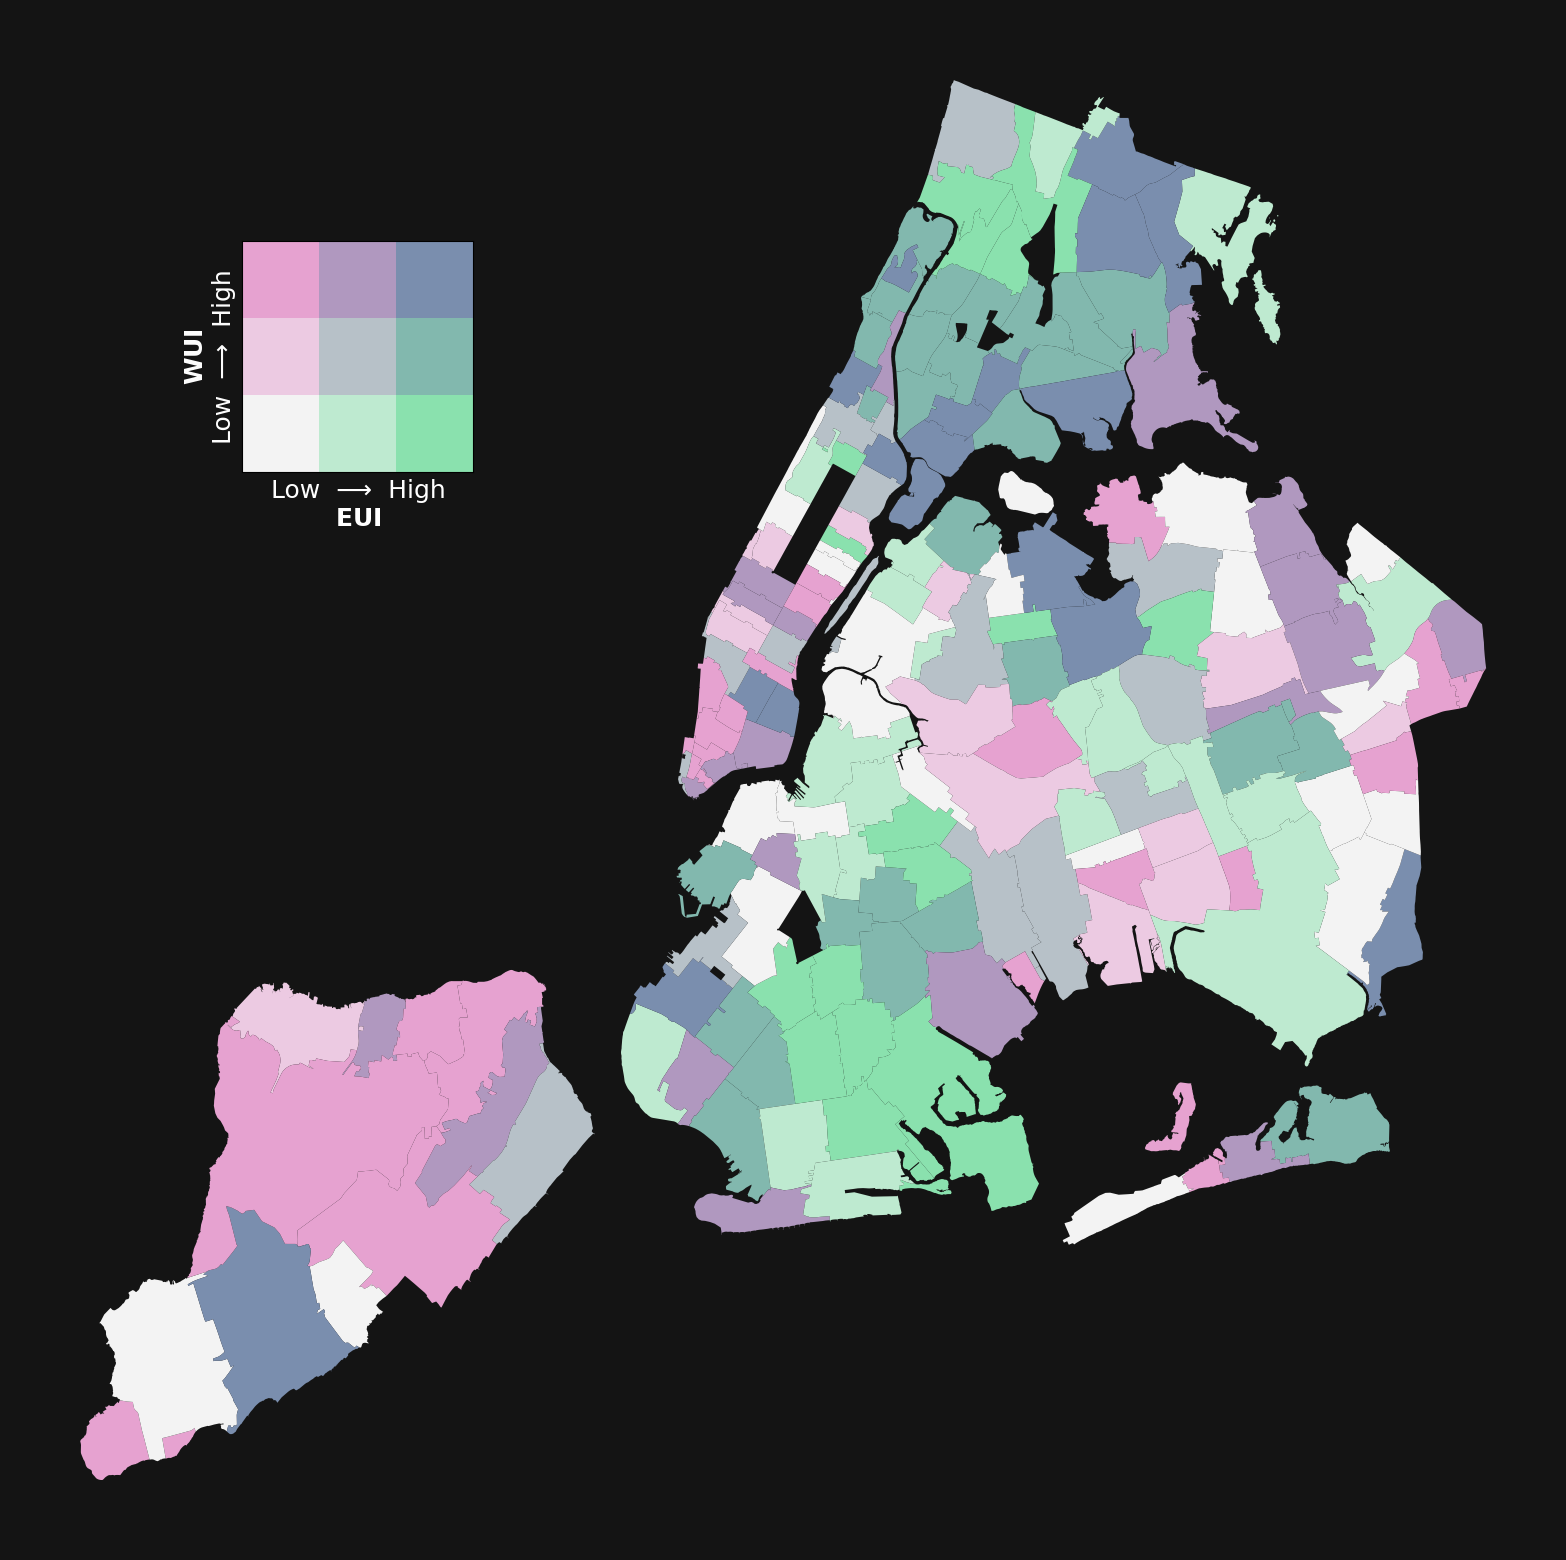

In [55]:
# Classify percentile bounds for EUI and WUI
merged_gdf['eui_pct'] = pd.qcut(merged_gdf['eui'], q=[0, 0.33, 0.66, 1], labels=[0, 1, 2])
merged_gdf['wui_pct'] = pd.qcut(merged_gdf['wui'], q=[0, 0.33, 0.66, 1], labels=[0, 1, 2])

# Define grid size for colors
num_grps = 3

# Function to assign bivariate color based on EUI and WUI categories
def get_bivariate_color(eui_pct, wui_pct):
    try:
        index = int(eui_pct) * num_grps + int(wui_pct)
        return colorlist[index] if index < len(colorlist) else "#CCCCCC"  # Default gray for unexpected values
    except (ValueError, TypeError):
        return "#CCCCCC"  # Default gray for NaN or invalid values

# Apply bivariate color assignment
merged_gdf['bivariate_color'] = merged_gdf.apply(lambda row: get_bivariate_color(row['eui_pct'], row['wui_pct']), axis=1)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20), facecolor='#141414')
merged_gdf.plot(ax=ax, color=merged_gdf['bivariate_color'], edgecolor='#141414', linewidth=0, alpha=1, legend=False)

# Remove axis ticks and set background color
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('#141414')

# Remove plot spines to avoid borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Create a legend inset in the bottom right corner
legend_ax = ax.inset_axes([0.15, 0.7, 0.15, 0.15])  # X, Y, width, height
legend_ax.set_aspect('equal', adjustable='box')
legend_ax.set_facecolor('#141414')

# Add legend elements
count = 0
for i in range(num_grps):
    for j in range(num_grps):
        rect = Rectangle((j, i), 1, 1, facecolor=colorlist[count])
        legend_ax.add_patch(rect)
        count += 1

legend_ax.set_xlim([0, num_grps])
legend_ax.set_ylim([0, num_grps])

# Remove legend ticks and add labels with white text
legend_ax.set_xticks([])
legend_ax.set_yticks([])
legend_ax.set_xlabel(r'Low  ⟶  High' '\n$\mathbf{EUI}$', fontsize=18, labelpad=5, color='white')
legend_ax.set_ylabel(r'$\mathbf{WUI}$' '\nLow  ⟶  High', fontsize=18, labelpad=5, color='white')

# Save the plot as PNG
output_filename = "base.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight', facecolor='#141414', pad_inches=0)

# Display the plot
plt.show()

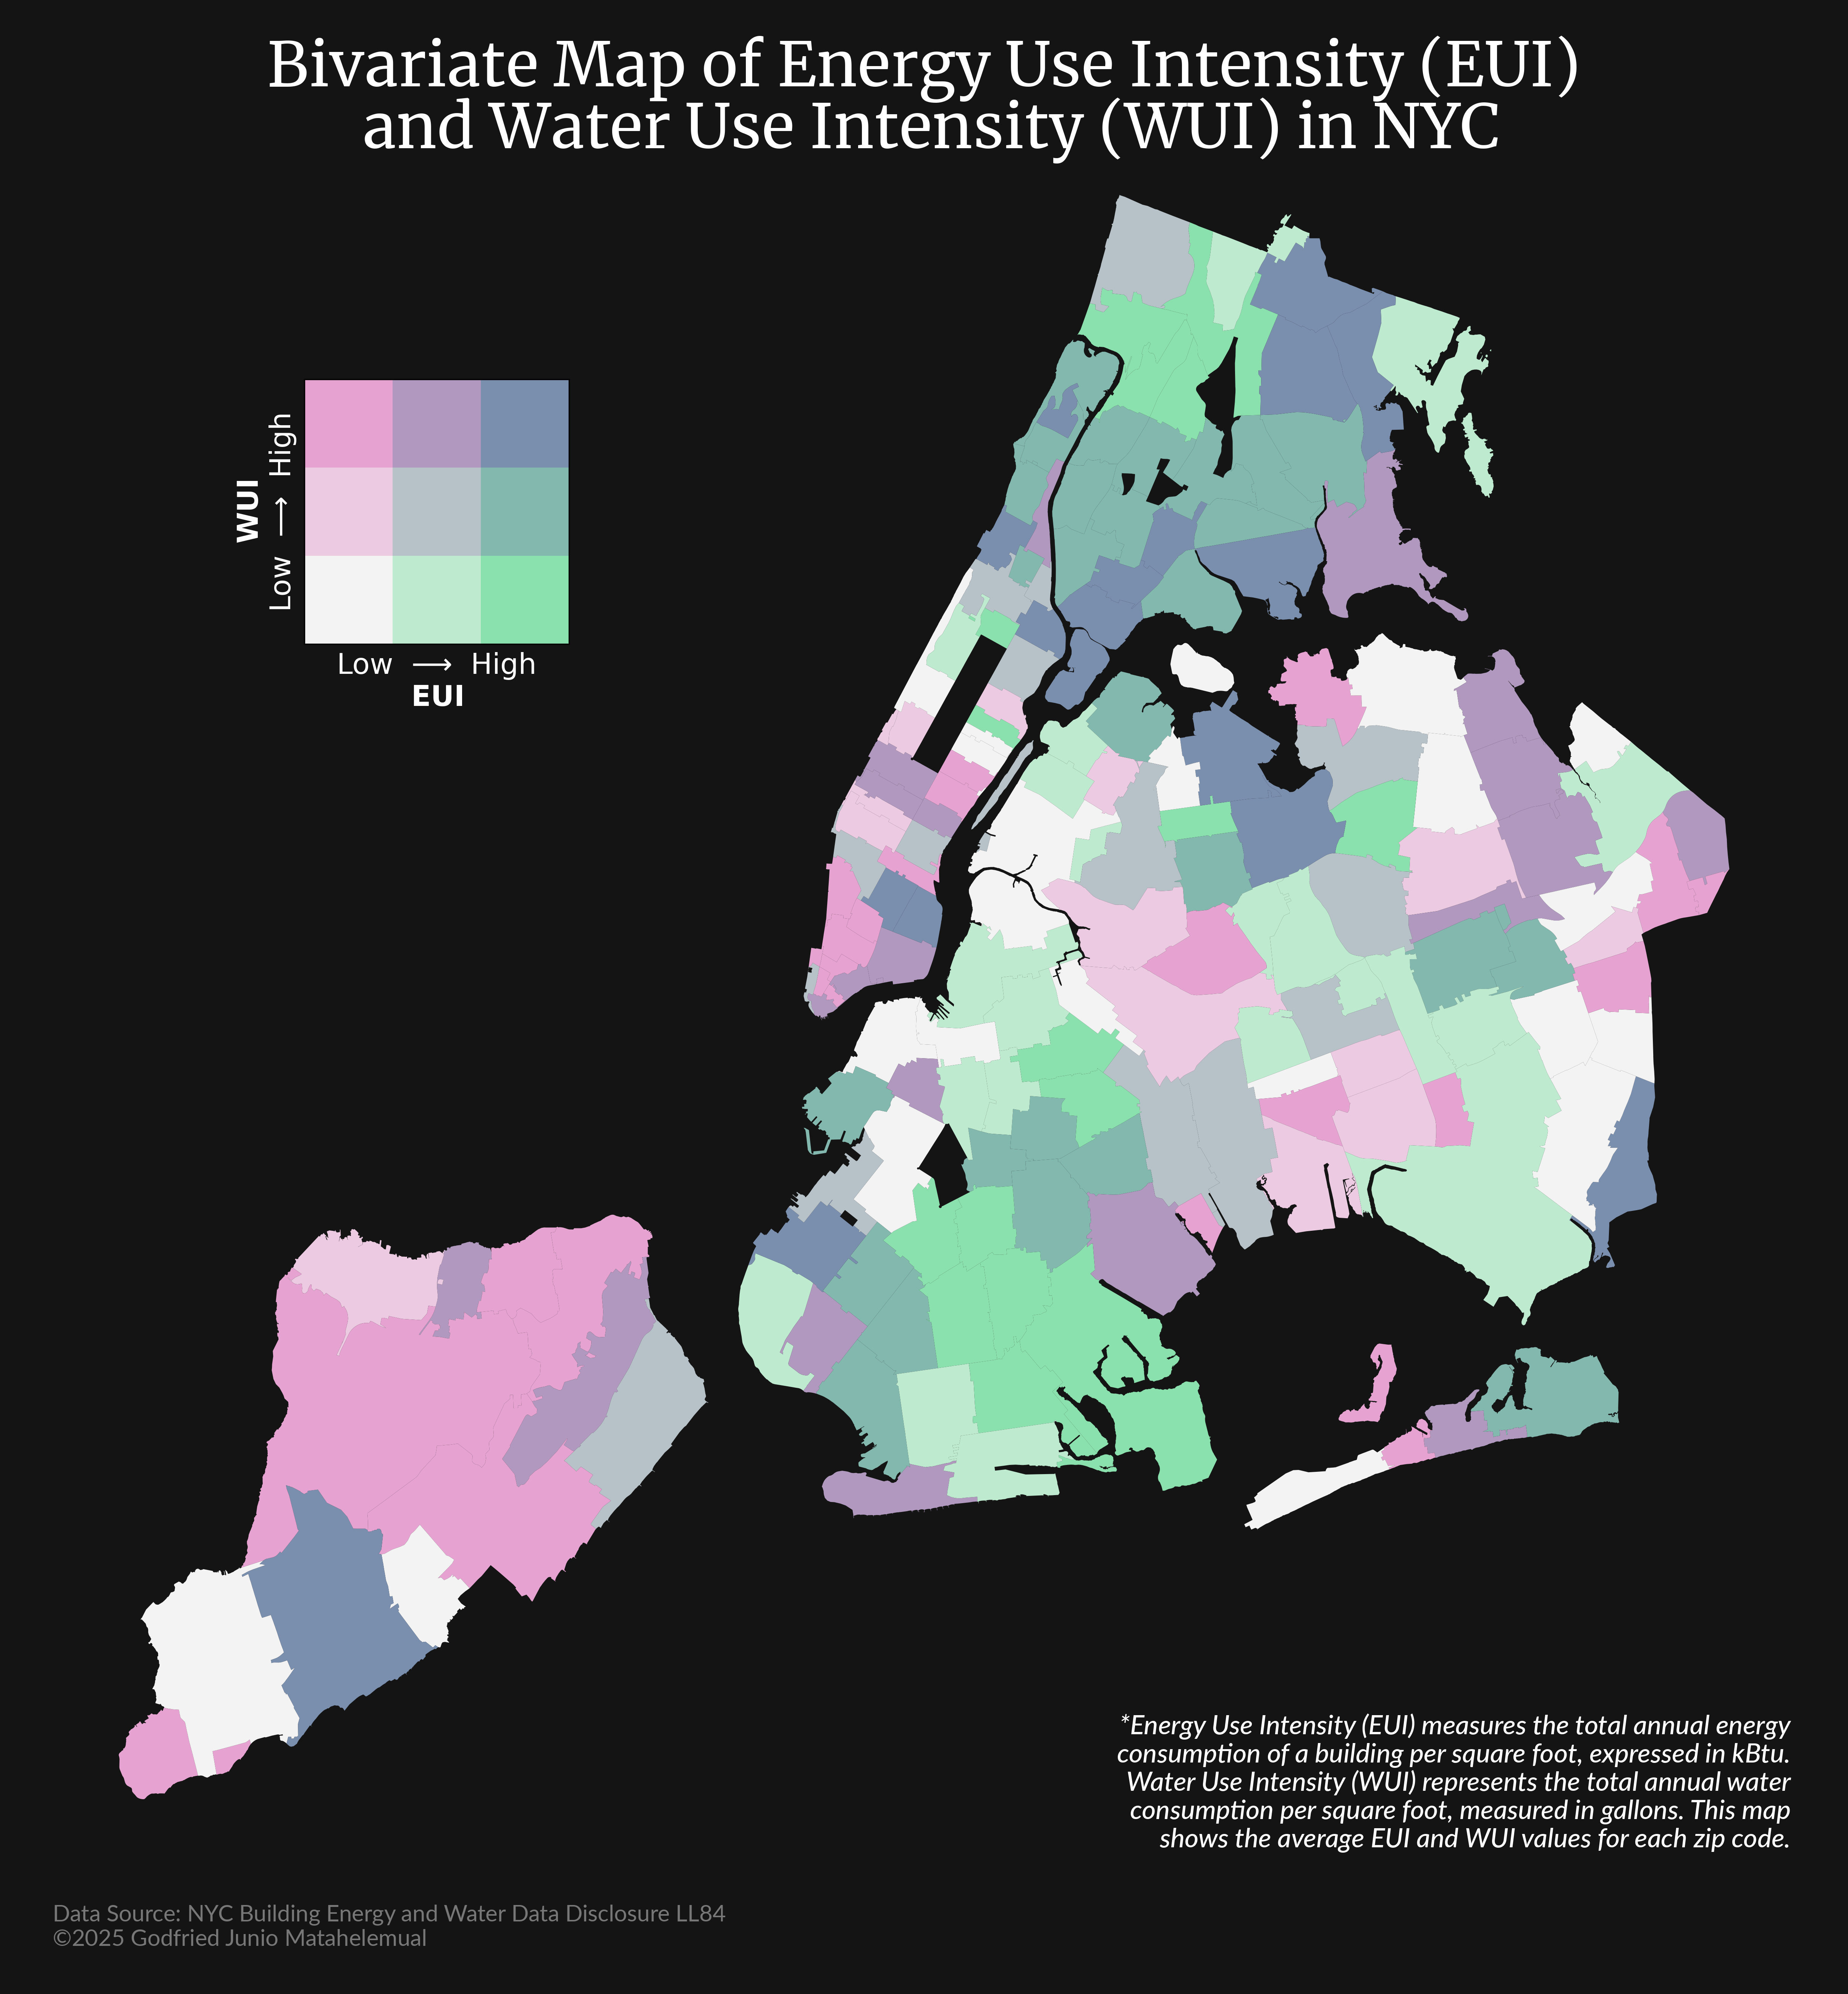

In [57]:
# FINAL TOUCH

# Load the generated choropleth map image
map_image = Image.open(output_filename)

# Add padding to the image (left, top, right, bottom)
padding = (100, 300, 100, 300)
padded_image = ImageOps.expand(map_image, border=padding, fill="#141414")

# Add title
title_text = "Bivariate Map of Energy Use Intensity (EUI)\n and Water Use Intensity (WUI) in NYC"
title_position = (padded_image.width // 2, 250)
draw = ImageDraw.Draw(padded_image)
draw.multiline_text(
    title_position,
    title_text,
    font=title_font,
    fill="white",
    anchor="mm",
    align="center",
)

# Description text
info_text = (
    "*Energy Use Intensity (EUI) measures the total annual energy\n"
    "consumption of a building per square foot, expressed in kBtu.\n"
    "Water Use Intensity (WUI) represents the total annual water\n"
    "consumption per square foot, measured in gallons. This map\n"
    "shows the average EUI and WUI values for each zip code."
)

# Set text position (bottom-right) and font
text_position = (padded_image.width - 150, padded_image.height - 750)  # Adjust for proper alignment

# Draw the text onto the image
draw.multiline_text(
    text_position,
    info_text,
    font=info_font,
    fill="white",
    anchor="ra",  # Right-aligned
    align="right",
)

# Add footer
footer_text = "Data Source: NYC Building Energy and Water Data Disclosure LL84\n©2025 Godfried Junio Matahelemual"
footer_position = (1900, padded_image.height - 250)  # Bottom right
draw.multiline_text(
    footer_position,
    footer_text,
    font=footer_font,
    fill="#777777",  # Gray color for footer
    anchor="ra",  # Right-aligned
    align="left",
)

# Save the final image with title and footer
final_output_filename = "day3_polygon_energy-water-use.png"
padded_image.save(final_output_filename)

# Show the final result
padded_image

---
# Reference
- https://waterprogramming.wordpress.com/2022/09/08/bivariate-choropleth-maps/